<div style="text-align: center;">
  <a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="400">
  </a>
</div>


<h1 align=left><font size = 6>Lab: Comparative Analysis of Keras and PyTorch Models </font></h1>


<h5>Estimated time: 90 minutes</h5>


<h2>Objective</h2>

After completing this lab, you will be able to:
<ul> 

1. Prepare data, load and evaluate Keras model.
2. Prepare data, load and evaluate PyTorch model.
3. Compute multiple performance metrics including accuracy, precision, recall, and f1-score.
4. Visualize receiver operating characteristic (ROC) curves.
</ul>


## Introduction

In this lab, you will compare the performance of the Keras-based and the PyTorch based convolutional neural network (CNN) models using various evaluation metrics.  Common metrics include:

- **Accuracy**: Measures how often the model is correct overall. A higher value means more total predictions are correct.

- **Precision**: Measures how many predicted positives are actually correct. A higher value means fewer false positives (incorrectly predicted positives).

- **Recall**: Measures how many real positives the model finds. A higher value means fewer false negatives (missed positive cases).

- **F1 Score**: Tells us about the balance between precision and recall. A higher value means a better trade-off between precision and recall.

- **ROC-AUC**: Measures the model’s ability to distinguish classes. A higher value reflects a model that can better distinguish between classes at all probability thresholds.


For all these metrics, the model should aim for values as close to 1.0 (or 100%) as possible. Lower values indicate poorer model performance. There are exceptions for some metrics in other settings (like various loss functions, where lower is better), but for these standard classification metrics, higher is always better.


## Table of Contents
<font size = 3> 
    
1. [Data download and extraction](#Data-download-and-extraction)
2. [Package installation](#Package-installation)
3. [Library imports and setup](#Library-imports-and-setup)
4. [Evaluation metrics](#Evaluation-metrics)
    1. [Accuracy](#1.-Accuracy)
    2. [Precision](#2.-Precision)
    3. [Recall](#3.-Recall-(sensitivity-or-true-positive-rate))
    4. [F1 score](#4.-F1-score)
    5. [Confusion matrix](#5.-Confusion-matrix)
    6. [ROC-AUC](#6.-ROC-AUC-(Receiver-operating-characteristic---Area-under-curve))
6. [Import the evaluation metrics](#Import-the-evaluation-metrics)
7. [Model paths and download](#Model-paths-and-download)
8. [Dataset path and parameters](#Dataset-path-and-parameters)
9. [PyTorch model evaluation and prediction](#PyTorch-model-evaluation-and-prediction)
10. [PyTorch metrics reporting](#PyTorch-metrics-reporting)
11. [Keras model evaluation and prediction](#Keras-model-evaluation-and-prediction)
12. [Keras metrics reporting](#Keras-metrics-reporting)
13. [ROC curve plotting](#ROC-curve-plotting)
14. [Comparing model performance](#Comparing-model-performance)

</font>


## Data download and extraction
We begin by downloading the dataset for evaluation of the models.
Here, you declare:
1. The dataset URL from where the dataset would be downloaded.
2. The dataset downloading primary function, based on `skillsnetwork` library.
3. The dataset fallback downloading function, based on regular `http` downloading functions.


In [1]:
import os
import skillsnetwork

data_dir = "."
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/4Z1fwRR295-1O3PMQBH6Dg/images-dataSAT.tar"


def check_skillnetwork_extraction(extract_dir):
    """Check if the environment allows symlink creation for download/extraction."""
    symlink_test = os.path.join(extract_dir, "symlink_test")
    if not os.path.exists(symlink_test):
        os.symlink(os.path.join(os.sep, "tmp"), symlink_test)
        print("Write permissions available for downloading and extracting the dataset tar file")
        os.unlink(symlink_test)

async def download_tar_dataset(url, tar_path, extract_dir):
    """Download and extract dataset tar file asynchronously."""
    if not os.path.exists(tar_path):
        try:
            print(f"Downloading from {url}...")
            import httpx
            async with httpx.AsyncClient() as client:
                response = await client.get(url, follow_redirects=True)
                response.raise_for_status()
                with open(tar_path, "wb") as f:
                    f.write(response.content)
            print(f"Successfully downloaded '{tar_path}'.")
        except Exception as e:
            print(f"Download error: {e}")
    else:
        print(f"Dataset tar file already exists at: {tar_path}")
    import tarfile
    with tarfile.open(tar_path, 'r:*') as tar_ref:
        tar_ref.extractall(path=extract_dir)
        print(f"Successfully extracted to '{extract_dir}'.")

try:
    check_skillnetwork_extraction(data_dir)
    await skillsnetwork.prepare(url=dataset_url, path=data_dir, overwrite=True)
except Exception as e:
    print(e)
    print("Primary download/extraction method failed.")
    print("Falling back to manual download and extraction...")
    import tarfile
    import httpx
    from pathlib import Path
    file_name = Path(dataset_url).name
    tar_path = os.path.join(data_dir, file_name)
    await download_tar_dataset(dataset_url, tar_path, data_dir)

Write permissions available for downloading and extracting the dataset tar file


  0%|          | 0/6003 [00:00<?, ?it/s]

Saved to '.'


## Package installation

Install the required basic Python packages. 


In [2]:
%%time
%%capture captured_output
%pip install numpy==1.26
%pip install matplotlib==3.9.2
%pip install skillsnetwork

CPU times: user 3.82 ms, sys: 9.09 ms, total: 12.9 ms
Wall time: 1.53 s


### Install PyTorch library


In [3]:
%%time
%pip install torch==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/68.6 MB ? eta -:--:--

   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/68.6 MB 46.1 MB/s eta 0:00:02

   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/68.6 MB 46.1 MB/s eta 0:00:02

   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/68.6 MB 46.1 MB/s eta 0:00:02

   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/68.6 MB 46.1 MB/s eta 0:00:02

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/68.6 MB 2.1 MB/s eta 0:00:33

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/68.6 MB 2.1 MB/s eta 0:00:33

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/68.6 MB 2.1 MB/s eta 0:00:33

   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/68.6 MB 1.8 MB/s eta 0:00:38

   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/68.6 MB 1.7 MB/s eta 0:00:39

   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/68.6 MB 2.0 MB/s eta 0:00:32

   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/68.6 MB 2.4 MB/s eta 0:00:27

   ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/68.6 MB 2.6 MB/s eta 0:00:25

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/68.6 MB 2.8 MB/s eta 0:00:23

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/68.6 MB 2.7 MB/s eta 0:00:23

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/68.6 MB 2.8 MB/s eta 0:00:22

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/68.6 MB 2.9 MB/s eta 0:00:21

   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/68.6 MB 3.0 MB/s eta 0:00:20

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/68.6 MB 2.7 MB/s eta 0:00:22

   ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/68.6 MB 2.3 MB/s eta 0:00:25

   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/68.6 MB 2.3 MB/s eta 0:00:24

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/68.6 MB 2.3 MB/s eta 0:00:23

   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/68.6 MB 2.4 MB/s eta 0:00:22

   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/68.6 MB 2.5 MB/s eta 0:00:21

   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/68.6 MB 2.5 MB/s eta 0:00:21

   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/68.6 MB 2.6 MB/s eta 0:00:20

   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/68.6 MB 2.6 MB/s eta 0:00:20

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/68.6 MB 2.6 MB/s eta 0:00:19

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/68.6 MB 2.7 MB/s eta 0:00:18

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/68.6 MB 2.7 MB/s eta 0:00:18

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/68.6 MB 2.7 MB/s eta 0:00:18

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/68.6 MB 2.7 MB/s eta 0:00:18

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/68.6 MB 2.7 MB/s eta 0:00:18

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/68.6 MB 2.4 MB/s eta 0:00:20

   ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/68.6 MB 2.5 MB/s eta 0:00:19

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/68.6 MB 2.5 MB/s eta 0:00:19

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/68.6 MB 2.6 MB/s eta 0:00:18

   ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/68.6 MB 2.6 MB/s eta 0:00:17

   ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/68.6 MB 2.6 MB/s eta 0:00:17

   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/68.6 MB 2.6 MB/s eta 0:00:17

   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/68.6 MB 2.6 MB/s eta 0:00:16

   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 28.0/68.6 MB 2.6 MB/s eta 0:00:16

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 28.3/68.6 MB 2.7 MB/s eta 0:00:16

   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 29.4/68.6 MB 2.7 MB/s eta 0:00:15

   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 29.4/68.6 MB 2.7 MB/s eta 0:00:15

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 30.4/68.6 MB 2.7 MB/s eta 0:00:15

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 30.4/68.6 MB 2.7 MB/s eta 0:00:15

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 31.5/68.6 MB 2.7 MB/s eta 0:00:14

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 32.5/68.6 MB 2.7 MB/s eta 0:00:14

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 33.6/68.6 MB 2.7 MB/s eta 0:00:13

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 33.6/68.6 MB 2.7 MB/s eta 0:00:13

   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 34.6/68.6 MB 2.8 MB/s eta 0:00:13

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 35.7/68.6 MB 2.8 MB/s eta 0:00:12

   ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 36.7/68.6 MB 2.8 MB/s eta 0:00:12

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━ 37.7/68.6 MB 2.9 MB/s eta 0:00:11

   ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 38.8/68.6 MB 2.9 MB/s eta 0:00:11

   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 39.8/68.6 MB 2.9 MB/s eta 0:00:10

   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 39.8/68.6 MB 2.9 MB/s eta 0:00:10

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 40.9/68.6 MB 2.9 MB/s eta 0:00:10

   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 41.9/68.6 MB 3.0 MB/s eta 0:00:09

   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 42.2/68.6 MB 2.9 MB/s eta 0:00:10

   ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 43.0/68.6 MB 3.0 MB/s eta 0:00:09

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 44.0/68.6 MB 3.0 MB/s eta 0:00:09

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 45.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 45.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 46.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 46.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 46.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 46.1/68.6 MB 3.0 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 46.4/68.6 MB 2.8 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 47.2/68.6 MB 2.9 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 48.2/68.6 MB 2.9 MB/s eta 0:00:08

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 49.3/68.6 MB 2.9 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 49.3/68.6 MB 2.9 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 49.3/68.6 MB 2.9 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 49.3/68.6 MB 2.9 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 50.3/68.6 MB 2.8 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 51.4/68.6 MB 2.9 MB/s eta 0:00:07

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 52.4/68.6 MB 2.9 MB/s eta 0:00:06

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 53.5/68.6 MB 2.9 MB/s eta 0:00:06

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 53.5/68.6 MB 2.9 MB/s eta 0:00:06

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 54.5/68.6 MB 2.9 MB/s eta 0:00:05

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 55.6/68.6 MB 2.9 MB/s eta 0:00:05

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 56.6/68.6 MB 2.9 MB/s eta 0:00:05

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 57.7/68.6 MB 3.0 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 58.7/68.6 MB 3.0 MB/s eta 0:00:04

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 59.8/68.6 MB 3.0 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 59.8/68.6 MB 3.0 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 60.8/68.6 MB 3.0 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 61.9/68.6 MB 3.0 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 62.9/68.6 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 62.9/68.6 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 64.0/68.6 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 65.0/68.6 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 65.3/68.6 MB 3.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 66.1/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 67.1/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 67.1/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 68.2/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 68.2/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 68.2/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 68.2/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 68.2/68.6 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 2.9 MB/s  0:00:23


  Attempting uninstall: torch
    Found existing installation: torch 2.9.0


    Uninstalling torch-2.9.0:


      Successfully uninstalled torch-2.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.24.0 requires torch==2.9.0, but you have torch 2.7.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
CPU times: user 485 ms, sys: 492 ms, total: 977 ms
Wall time: 30.6 s


### Install PyTorch helper libraries


In [4]:
%%time
%pip install torchvision==0.22

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.9 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 1.0/1.9 MB 59.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.7 MB/s  0:00:00


  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.24.0


    Uninstalling torchvision-0.24.0:
      Successfully uninstalled torchvision-0.24.0


Note: you may need to restart the kernel to use updated packages.
CPU times: user 7.17 ms, sys: 5.9 ms, total: 13.1 ms
Wall time: 1.73 s


### Install tensorflow library for Keras


In [5]:
%%time
%pip install tensorflow==2.19

ERROR: Could not find a version that satisfies the requirement tensorflow==2.19 (from versions: 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.19


Note: you may need to restart the kernel to use updated packages.
CPU times: user 1.77 ms, sys: 2.99 ms, total: 4.76 ms
Wall time: 486 ms


### Install SkLearn library for evaluation metrics


In [6]:
%%time
%pip install scikit-learn==1.7.0

Note: you may need to restart the kernel to use updated packages.
CPU times: user 2.13 ms, sys: 4.02 ms, total: 6.15 ms
Wall time: 504 ms


## Library imports and setup

Import essential libraries for data manipulation, visualization, and suppresses warnings for cleaner notebook output.


In [7]:
%%time
import warnings
warnings.filterwarnings('ignore')

import os
import time
import httpx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

CPU times: user 138 ms, sys: 18.6 ms, total: 156 ms
Wall time: 160 ms


### PyTorch library imports

Import core PyTorch modules for model building, optimization, data loading, and functional utilities.


In [8]:
%%time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

print("Imported libraries")

Imported libraries
CPU times: user 835 ms, sys: 271 ms, total: 1.11 s
Wall time: 9.58 s


### TensorFlow/Keras library imports

These imports set the environment variables to reduce TensorFlow logging noise and imports Keras modules for model building and training. They detect GPU availability for device assignment.


In [9]:
%%time
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.callbacks import ModelCheckpoint

gpu_list = tf.config.list_physical_devices('GPU')
device = "gpu" if gpu_list != [] else "cpu"
print(f"Device available for training: {device}")

Device available for training: cpu
CPU times: user 2.24 s, sys: 230 ms, total: 2.47 s
Wall time: 2.7 s


## Evaluation metrics 

The following metrics are used for evaluation of various AI/ML models:
    
- Accuracy
- Precision
- Recall
- F1 score
- Confusion matrix
- Receiver Operating Characteristic - Area Under Curve (ROC-AUC)

You can read about their calculation methods and their significance for model performance below.


### 1. Accuracy

**Definition:**
Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. In other words, it measures how often the classifier is correct overall.

**Formula:**
\[
Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$
\]

- TP: True positives (correctly predicted positive cases)
- TN: True negatives (correctly predicted negative cases)
- FP: False positives (incorrectly predicted positive cases)
- FN: False negatives (incorrectly predicted negative cases)

**Significance:**

Accuracy is intuitive and easy to interpret, making it a common first metric for model evaluation. However, it can be misleading if the dataset is imbalanced (i.e., one class is much more frequent than the other). This is because a model can achieve high accuracy by simply predicting the majority class.


### 2. Precision

**Definition:**
Precision measures the proportion of positive predictions that are actually correct. It answers the question: "Of all the samples that the model predicted as positive, how many were truly positive?"

**Formula:**
\[
Precision = $\frac{TP}{TP + FP}$
\]

**Significance:**
Precision is crucial when the cost of a false positive is high. For example, in medical diagnosis, predicting a disease when it's not present (false positive) can lead to unnecessary treatments. In land classification, high precision means that when the model predicts a tile as agricultural, it is likely correct.


### 3. Recall (sensitivity or true positive rate)

**Definition:**
Recall measures the proportion of actual positive cases that were correctly identified by the model. It answers: "Of all the true positive samples, how many did the model identify?"

**Formula:**
\[
Recall = $\frac{TP}{TP + FN}$
\]

**Significance:**
Recall is important when the cost of missing a positive case (false negative) is high. In land classification, high recall means the model is good at finding all the agricultural land, even if it sometimes mislabels non-agricultural land as agricultural.


### 4. F1 score

**Definition:**
The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns. It is especially useful when you need to find an equilibrium between precision and recall.

**Formula:**
\[
F1 = $2 \times \frac{Precision \times Recall}{Precision + Recall}$
\]

**Significance:**
The F1 score is especially valuable when the class distribution is uneven or when both false positives and false negatives are important. It penalizes extreme values, so a model with high precision but low recall (or vice versa) will have a lower F1 score.


### 5. Confusion matrix

**Definition:**
A confusion matrix is a table that summarizes the performance of a classification algorithm. It displays the counts of true positives, false positives, true negatives, and false negatives.

|               | Predicted positive | Predicted negative |
|---------------|-------------------|-------------------|
| Actual positive | True positive (TP) | False negative (FN) |
| Actual negative | False positive (FP) | True negative (TN) |

**Significance:**
The confusion matrix provides a detailed breakdown of model errors and successes, helping you understand not just how often the model is right, but *how* it is wrong. This is crucial for diagnosing issues like class imbalance or systematic misclassification.


### 6. ROC-AUC (Receiver operating characteristic - Area under curve)

**Definition:**
ROC-AUC measures the model's ability to distinguish between classes across all possible classification thresholds. The ROC curve plots the true positive rate (recall) against the false positive rate at various thresholds. The AUC (area under the curve) summarizes this performance in a single value between 0 and 1.

**Significance:**
A model with an ROC-AUC of 1.0 perfectly distinguishes between classes, while a value of 0.5 suggests random guessing. ROC-AUC is especially useful for imbalanced datasets and when you care about the ranking of predictions rather than their absolute values.


## Import the evaluation metrics

Here you define the functions to compute and print classification metrics including accuracy, precision, recall, F1 score, ROC-AUC, confusion matrix, and log loss. These functions support both Keras and PyTorch model outputs.


In [10]:
%%time
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_curve, 
                             roc_auc_score,
                             log_loss,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                            )
from sklearn.preprocessing import label_binarize

# define a function to get the metrics comprehensively
def model_metrics(y_true, y_pred, y_prob, class_labels):
    metrics = {'Accuracy': accuracy_score(y_true, y_pred),
               'Precision': precision_score(y_true, y_pred),
               'Recall': recall_score(y_true, y_pred),
               'Loss': log_loss(y_true, y_prob),
               'F1 Score': f1_score(y_true, y_pred),
               'ROC-AUC': roc_auc_score(y_true, y_prob),
               'Confusion Matrix': confusion_matrix(y_true, y_pred),
               'Classification Report': classification_report(y_true, y_pred, target_names=class_labels, digits=4),
               "Class labels": class_labels
              }
    return metrics

#function to print the metrics
def print_metrics(y_true, y_pred, y_prob, class_labels, model_name):
    metrics = model_metrics(y_true, y_pred, y_prob, class_labels)
    print(f"Evaluation metrics for the \033[1m{model_name}\033[0m")
    print(f"Accuracy: {'':<1}{metrics["Accuracy"]:.4f}")
    print(f"ROC-AUC: {'':<2}{metrics["ROC-AUC"]:.4f}")
    print(f"Loss: {'':<5}{metrics["Loss"]:.4f}\n")
    print(f"Classification report:\n\n  {metrics["Classification Report"]}")
    print("========= Confusion Matrix =========")
    disp = ConfusionMatrixDisplay(confusion_matrix=metrics["Confusion Matrix"],
                                  display_labels=metrics["Class labels"])

    disp.plot()
    plt.show()



CPU times: user 72.7 ms, sys: 10.5 ms, total: 83.2 ms
Wall time: 83.1 ms


## Model download helper

Now, define an asynchronous function to download model files from given URLs, if they are not already present locally. 
You use `httpx` for asynchronous HTTP requests with error handling.


In [11]:
async def download_model(url, model_path):
    if not os.path.exists(model_path):
        try:
            print(f"Downloading from {url}...")
            import httpx
            async with httpx.AsyncClient() as client:
                response = await client.get(url, follow_redirects=True)
                response.raise_for_status()
                with open(model_path, "wb") as f:
                    f.write(response.content)
            print(f"Successfully downloaded '{model_path}'.")
        except Exception as e:
            print(f"Download error: {e}")
    else:
        print(f"Model file already downloaded at: {model_path}")

## Model paths and download

In the cell below, you define the file paths and URLs for the Keras and PyTorch models and download them using the `download_model` function defined above.


In [12]:
data_dir = "."

keras_model_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/U-uPeyCyOQYh0GrZPGsqoQ/ai-capstone-keras-best-model-model.keras"
keras_model_name = "ai-capstone-keras-best-model-model_downloaded.keras"
keras_model_path = os.path.join(data_dir, keras_model_name)

pytorch_state_dict_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/8J2QEyQqD8x9zjrlnv6N7g/ai-capstone-pytorch-best-model-20250713.pth"
pytorch_state_dict_name = "ai_capstone_pytorch_best_model_state_dict_downloaded.pth"
pytorch_state_dict_path = os.path.join(data_dir, pytorch_state_dict_name)

await download_model(keras_model_url, keras_model_path)
await download_model(pytorch_state_dict_url, pytorch_state_dict_path)

Successfully downloaded './ai-capstone-keras-best-model-model_downloaded.keras'.


Successfully downloaded './ai_capstone_pytorch_best_model_state_dict_downloaded.pth'.


## Dataset path and parameters

Here, for downstream processing, you define 
1. the dataset directory path
2. define image dimensions
3. number of channels
4. batch size
5. number of classes
6. class labels


In [13]:
dataset_path = os.path.join(data_dir, "images_dataSAT")
print(dataset_path)

img_w, img_h = 64, 64
n_channels = 3
batch_size = 128
num_classes = 2

agri_class_labels = ["non-agri", "agri"]


./images_dataSAT


## Keras model evaluation and prediction

In this cell, you will:
- Use `ImageDataGenerator` to rescale images.
- Load test images from the dataset directory.
- Load the saved Keras model using `tf.keras.models.load_model`.
- Run predictions on the test set, collect predicted probabilities, predicted classes, and true labels.


In [14]:
%%time

datagen = ImageDataGenerator(rescale=1./255)
prediction_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_w, img_h),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

keras_model = tf.keras.models.load_model(keras_model_path)

steps = int(np.ceil(prediction_generator.samples / prediction_generator.batch_size))
batch_size = int(prediction_generator.batch_size)
print(f"Number of Steps: {steps} with batch size: {batch_size}")

all_preds_keras = []
all_probs_keras = []
all_labels_keras = []

for step_idx, step in enumerate(tqdm(range(steps), desc="Steps")):
    images, labels = next(prediction_generator)
    preds = keras_model.predict(images, verbose='0')
    all_probs_keras.extend(preds)
    preds = (preds > 0.5).astype(int).flatten()
    all_preds_keras.extend(preds)
    all_labels_keras.extend(labels)

Found 6000 images belonging to 2 classes.


Number of Steps: 47 with batch size: 128


Steps:   0%|          | 0/47 [00:00<?, ?it/s]

Steps:   2%|▏         | 1/47 [00:00<00:12,  3.54it/s]

Steps:   4%|▍         | 2/47 [00:00<00:08,  5.01it/s]

Steps:   6%|▋         | 3/47 [00:00<00:07,  5.80it/s]

Steps:   9%|▊         | 4/47 [00:00<00:07,  6.13it/s]

Steps:  11%|█         | 5/47 [00:00<00:06,  6.42it/s]

Steps:  13%|█▎        | 6/47 [00:00<00:06,  6.60it/s]

Steps:  15%|█▍        | 7/47 [00:01<00:05,  6.73it/s]

Steps:  17%|█▋        | 8/47 [00:01<00:05,  6.85it/s]

Steps:  19%|█▉        | 9/47 [00:01<00:05,  6.89it/s]

Steps:  21%|██▏       | 10/47 [00:01<00:05,  6.95it/s]

Steps:  23%|██▎       | 11/47 [00:01<00:05,  6.99it/s]

Steps:  26%|██▌       | 12/47 [00:01<00:04,  7.04it/s]

Steps:  28%|██▊       | 13/47 [00:01<00:04,  7.06it/s]

Steps:  30%|██▉       | 14/47 [00:02<00:04,  7.09it/s]

Steps:  32%|███▏      | 15/47 [00:02<00:04,  7.14it/s]

Steps:  34%|███▍      | 16/47 [00:02<00:04,  7.14it/s]

Steps:  36%|███▌      | 17/47 [00:02<00:04,  7.15it/s]

Steps:  38%|███▊      | 18/47 [00:02<00:04,  7.08it/s]

Steps:  40%|████      | 19/47 [00:02<00:03,  7.10it/s]

Steps:  43%|████▎     | 20/47 [00:02<00:03,  7.08it/s]

Steps:  45%|████▍     | 21/47 [00:03<00:03,  7.11it/s]

Steps:  47%|████▋     | 22/47 [00:03<00:03,  7.10it/s]

Steps:  49%|████▉     | 23/47 [00:03<00:03,  7.12it/s]

Steps:  51%|█████     | 24/47 [00:03<00:03,  7.13it/s]

Steps:  53%|█████▎    | 25/47 [00:03<00:03,  7.13it/s]

Steps:  55%|█████▌    | 26/47 [00:03<00:02,  7.14it/s]

Steps:  57%|█████▋    | 27/47 [00:03<00:02,  7.12it/s]

Steps:  60%|█████▉    | 28/47 [00:04<00:02,  7.13it/s]

Steps:  62%|██████▏   | 29/47 [00:04<00:02,  7.16it/s]

Steps:  64%|██████▍   | 30/47 [00:04<00:02,  7.16it/s]

Steps:  66%|██████▌   | 31/47 [00:04<00:02,  7.13it/s]

Steps:  68%|██████▊   | 32/47 [00:04<00:02,  7.14it/s]

Steps:  70%|███████   | 33/47 [00:04<00:01,  7.15it/s]

Steps:  72%|███████▏  | 34/47 [00:04<00:01,  7.08it/s]

Steps:  74%|███████▍  | 35/47 [00:05<00:01,  7.12it/s]

Steps:  77%|███████▋  | 36/47 [00:05<00:01,  7.12it/s]

Steps:  79%|███████▊  | 37/47 [00:05<00:01,  7.11it/s]

Steps:  81%|████████  | 38/47 [00:05<00:01,  7.12it/s]

Steps:  83%|████████▎ | 39/47 [00:05<00:01,  7.14it/s]

Steps:  85%|████████▌ | 40/47 [00:05<00:00,  7.17it/s]

Steps:  87%|████████▋ | 41/47 [00:05<00:00,  7.11it/s]

Steps:  89%|████████▉ | 42/47 [00:06<00:00,  7.10it/s]

Steps:  91%|█████████▏| 43/47 [00:06<00:00,  7.10it/s]

Steps:  94%|█████████▎| 44/47 [00:06<00:00,  7.12it/s]

Steps:  96%|█████████▌| 45/47 [00:06<00:00,  7.16it/s]

Steps:  98%|█████████▊| 46/47 [00:06<00:00,  7.11it/s]

Steps: 100%|██████████| 47/47 [00:06<00:00,  5.91it/s]

Steps: 100%|██████████| 47/47 [00:06<00:00,  6.86it/s]

CPU times: user 53.9 s, sys: 3.49 s, total: 57.4 s
Wall time: 7.36 s


#### Question: What does the code **`preds > 0.5`** in line `preds = (preds > 0.5).astype(int).flatten()` do?


Please use the space below to write your answer.


Double-click **here** for the solution.
<!--
"It converts all predictions greater than 0.5 to True or assign to class 1. Rest of the predictions are False, assigned to class 0"
-->


## Keras metrics reporting


### Task 1: Print the performance metrics for the Keras model using `print_metrics` function

Print various performance metrics for the **Keras** model. You may use the previously defined metrics print function `print_metrics`.


In [15]:
## Please use the space below to write your answer



Double-click **here** for the solution.
<!--
print_metrics(y_true = all_labels_keras,
              y_pred = all_preds_keras,
              y_prob = all_probs_keras,
              class_labels = agri_class_labels,
              model_name = "Keras Model"
             )

-->


#### Question: What is the significance of `f1 score`?


Please use the space below to write your answer.



Double-click **here** for the solution.
<!--
"It is useful when both false positives and false negatives are important"
-->


## PyTorch model evaluation and prediction

In this cell, you:
- Set device for inference (GPU if available).
- Define data transformations including resizing, normalization.
- Load the dataset using `ImageFolder` and prepares a DataLoader.
- Define the CNN architecture matching the saved state dict.
- Load model weights.
- Run inference on the test set, collecting predicted classes, probabilities, and true labels for metric calculation.


In [16]:
%%time
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Processing inference on {device}")

train_transform = transforms.Compose([
    transforms.Resize((img_w, img_h)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
full_dataset = datasets.ImageFolder(dataset_path, transform=train_transform)
test_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=False)

model = nn.Sequential(
    nn.Conv2d(3, 32, 5, padding=2), nn.ReLU(),
    nn.MaxPool2d(2), nn.BatchNorm2d(32),
    nn.Conv2d(32, 64, 5, padding=2), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(64),
    nn.Conv2d(64, 128, 5, padding=2), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(128),
    nn.Conv2d(128, 256, 5, padding=2), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(256),
    nn.Conv2d(256, 512, 5, padding=2), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(512),
    nn.Conv2d(512, 1024, 5, padding=2), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(1024),
    nn.AdaptiveAvgPool2d(1), nn.Flatten(),
    nn.Linear(1024, 2048), nn.ReLU(), nn.BatchNorm1d(2048), nn.Dropout(0.4),
    nn.Linear(2048, num_classes)
).to(device)

print("Created model, now loading the weights from saved model state dict")
model.load_state_dict(torch.load(pytorch_state_dict_path))
print("Loaded model state dict, now getting predictions")

all_preds_pytorch = []
all_labels_pytorch = []
all_probs_pytorch = []


model.eval()
with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(tqdm(test_loader, desc="Step")):
#    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        probs = F.softmax(outputs, dim=1)[:, 1]  # probability for class 1
        all_probs_pytorch.extend(probs.cpu())
        all_preds_pytorch.extend(preds.cpu().numpy().flatten())
        all_labels_pytorch.extend(labels.numpy())

Processing inference on cpu
Created model, now loading the weights from saved model state dict
Loaded model state dict, now getting predictions


Step:   0%|          | 0/47 [00:00<?, ?it/s]

Step:   2%|▏         | 1/47 [00:00<00:10,  4.55it/s]

Step:   4%|▍         | 2/47 [00:00<00:08,  5.01it/s]

Step:   6%|▋         | 3/47 [00:00<00:08,  5.32it/s]

Step:   9%|▊         | 4/47 [00:00<00:07,  5.44it/s]

Step:  11%|█         | 5/47 [00:00<00:07,  5.49it/s]

Step:  13%|█▎        | 6/47 [00:01<00:07,  5.50it/s]

Step:  15%|█▍        | 7/47 [00:01<00:07,  5.57it/s]

Step:  17%|█▋        | 8/47 [00:01<00:06,  5.68it/s]

Step:  19%|█▉        | 9/47 [00:01<00:06,  5.69it/s]

Step:  21%|██▏       | 10/47 [00:01<00:06,  5.74it/s]

Step:  23%|██▎       | 11/47 [00:01<00:06,  5.74it/s]

Step:  26%|██▌       | 12/47 [00:02<00:06,  5.81it/s]

Step:  28%|██▊       | 13/47 [00:02<00:05,  5.76it/s]

Step:  30%|██▉       | 14/47 [00:02<00:05,  5.85it/s]

Step:  32%|███▏      | 15/47 [00:02<00:05,  5.87it/s]

Step:  34%|███▍      | 16/47 [00:02<00:05,  5.82it/s]

Step:  36%|███▌      | 17/47 [00:03<00:05,  5.79it/s]

Step:  38%|███▊      | 18/47 [00:03<00:05,  5.79it/s]

Step:  40%|████      | 19/47 [00:03<00:04,  5.78it/s]

Step:  43%|████▎     | 20/47 [00:03<00:04,  5.80it/s]

Step:  45%|████▍     | 21/47 [00:03<00:04,  5.75it/s]

Step:  47%|████▋     | 22/47 [00:03<00:04,  5.73it/s]

Step:  49%|████▉     | 23/47 [00:04<00:04,  5.78it/s]

Step:  51%|█████     | 24/47 [00:04<00:03,  5.83it/s]

Step:  53%|█████▎    | 25/47 [00:04<00:03,  5.81it/s]

Step:  55%|█████▌    | 26/47 [00:04<00:03,  5.85it/s]

Step:  57%|█████▋    | 27/47 [00:04<00:03,  5.84it/s]

Step:  60%|█████▉    | 28/47 [00:04<00:03,  5.87it/s]

Step:  62%|██████▏   | 29/47 [00:05<00:03,  5.88it/s]

Step:  64%|██████▍   | 30/47 [00:05<00:02,  5.88it/s]

Step:  66%|██████▌   | 31/47 [00:05<00:02,  5.93it/s]

Step:  68%|██████▊   | 32/47 [00:05<00:02,  5.94it/s]

Step:  70%|███████   | 33/47 [00:05<00:02,  5.93it/s]

Step:  72%|███████▏  | 34/47 [00:05<00:02,  5.91it/s]

Step:  74%|███████▍  | 35/47 [00:06<00:02,  5.98it/s]

Step:  77%|███████▋  | 36/47 [00:06<00:01,  6.03it/s]

Step:  79%|███████▊  | 37/47 [00:06<00:01,  6.04it/s]

Step:  81%|████████  | 38/47 [00:06<00:01,  6.04it/s]

Step:  83%|████████▎ | 39/47 [00:06<00:01,  6.06it/s]

Step:  85%|████████▌ | 40/47 [00:06<00:01,  6.09it/s]

Step:  87%|████████▋ | 41/47 [00:07<00:00,  6.00it/s]

Step:  89%|████████▉ | 42/47 [00:07<00:00,  6.00it/s]

Step:  91%|█████████▏| 43/47 [00:07<00:00,  6.00it/s]

Step:  94%|█████████▎| 44/47 [00:07<00:00,  6.01it/s]

Step:  96%|█████████▌| 45/47 [00:07<00:00,  5.98it/s]

Step:  98%|█████████▊| 46/47 [00:07<00:00,  5.98it/s]

Step: 100%|██████████| 47/47 [00:08<00:00,  6.13it/s]

Step: 100%|██████████| 47/47 [00:08<00:00,  5.84it/s]

CPU times: user 46.5 s, sys: 2.46 s, total: 48.9 s
Wall time: 8.13 s


## PyTorch metrics reporting


### Task 2: Print the performance metrics for the PyTorch model using `print_metrics`

Print various performance metrics for the PyTorch model. You may use the previously defined metrics print function `print_metrics`.


In [17]:
## Please use the space below to write your answer



Double-click **here** for the solution.
<!--
print_metrics(y_true = all_labels_pytorch,
              y_pred = all_preds_pytorch,
              y_prob = all_probs_pytorch,
              class_labels = agri_class_labels,
              model_name = "PyTorch Model"
             )
-->


#### Question: What are the total number of false negatives in the `confusion matrix` in the PyTorch model evaluated above? 


Please use the space below to write your answer.


Double-click **here** for the solution.
<!--
"Total Flase negatives are 5"
-->


## ROC curve plotting

First, define a function to plot ROC curves for binary or multi-class classification using scikit-learn's `roc_curve` and `roc_auc_score`. It handles both single-class and multi-class cases by binarizing labels if needed.

Next, plot the ROC curves for both the models.


In [18]:

def plot_roc(y_true, y_prob, model_name):
    n_classes = y_prob.shape[1] if y_prob.ndim > 1 else 1
    if n_classes == 1:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        auc = roc_auc_score(y_true, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    else:
        y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
            auc = roc_auc_score(y_true_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f'{model_name} class {i} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

### ROC curve plotting for both models

Plot the ROC curves for both Keras and PyTorch models on the same figure for visual performance comparison.


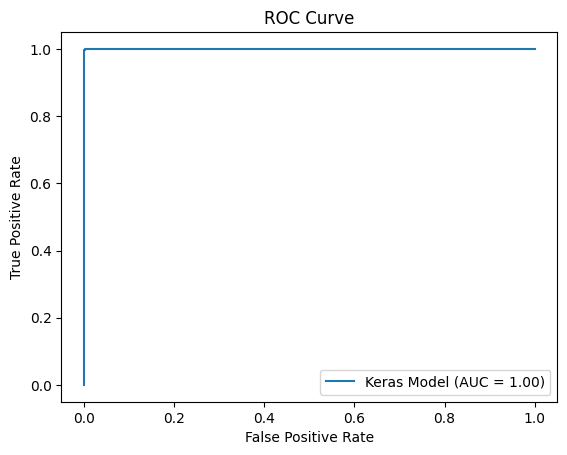

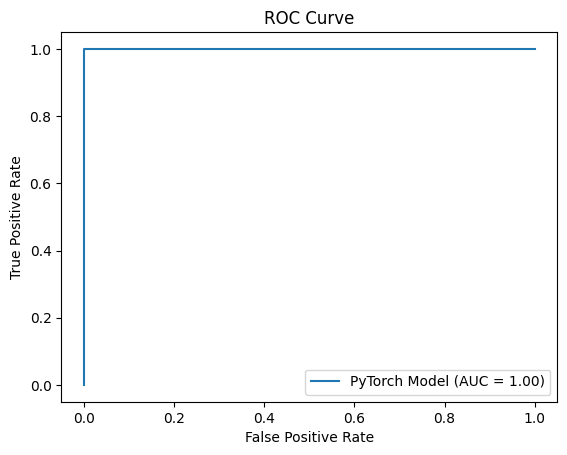

In [19]:
plot_roc(np.array(all_labels_keras), np.array(all_probs_keras), "Keras Model")
plt.show()
plot_roc(np.array(all_labels_pytorch), np.array(all_probs_pytorch), "PyTorch Model")
plt.show()

## Comparing model performance

Now compare the performance of different models to understand which model would be the best performer for your land classification task.


In [20]:
# get the Keras model performance metrics
metrics_keras = model_metrics(all_labels_keras, all_preds_keras, all_probs_keras, agri_class_labels)

# get the PyTorch model performance metrics
metrics_pytorch = model_metrics(all_labels_pytorch, all_preds_pytorch, all_probs_pytorch, agri_class_labels)


# Display the comparison of metrics
print("{:<18} {:<15} {:<15}".format('\033[1m'+ 'Metric' + '\033[0m',
                                    'Keras Model', 
                                    'PyTorch Model'))

mertics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

for k in mertics_list:
    print("{:<18} {:<15.4f} {:<15.4f}".format('\033[1m'+k+'\033[0m',
                                              metrics_keras[k],
                                              metrics_pytorch[k]))

Metric     Keras Model     PyTorch Model  
Accuracy   0.9925          0.9988         
Precision  1.0000          0.9983         
Recall     0.9850          0.9993         
F1 Score   0.9924          0.9988         
ROC-AUC    1.0000          1.0000         


### Metric analysis

The metrics for the pre-trained Keras and PyTorch models for evaluating the provided dataset are:

- **Accuracy**
    1. Keras: 0.9925
    2. PyTorch: 0.9988
    
    ===> Both models achieve exceptional accuracy, but the **PyTorch model makes fewer mistakes**.

- **Precision**
    1. Keras: 1.0000
    2. PyTorch: 0.9983

    ===> The **Keras** model perfectly **avoids false positives**, whereas the PyTorch model is slightly less perfect but still excellent.

- **Recall**
    1. Keras: 0.9850
    2. PyTorch: 0.9993
    
    ===> The **PyTorch** model is marginally better at **identifying all true positives**, capturing nearly all actual positive cases, while the Keras model misses a few.

- **F1 Score**
    1. PyTorch: 0.9988
    2. Keras: 0.9924
    
    ===> The F1 score, which balances precision and recall, favors the **PyTorch** model thanks to its **stronger recall**.

- **ROC-AUC**
    1. Keras: 1.0000
    2. PyTorch: 1.0000
    
    ===> Both models reach maximum possible **discrimination between classes**, indicating outstanding capability for binary classification.


### **Model comparison: Key insights**


**PyTorch model strengths**

 - Achieves the highest scores in accuracy, recall, and F1, indicating extremely robust overall performance and near-perfect classification of positive cases
- ROC-AUC of 1.0 shows perfect class separability


**Keras model strengths**

- Displays almost perfect precision every positive prediction made is correct
- Also achieves perfect ROC-AUC, indicating outstanding discrimination ability


**Common strength**

- Both models deliver flawless ROC-AUC, suggesting both are highly effective for this classification task


**Recommendations**

Based on the scores from the uploaded pre-trained models:

- The PyTorch model is preferable for applications where missing any positive instances is costly (higher recall)
- The Keras model is optimal for scenarios where making any false positive error is unacceptable (higher precision).


**Next**

- Analyze the confusion matrices to investigate the errors.
- Monitor real-world performance, as even marginal differences can become important in high-impact applications. 


**Summary**

Both models excel in all evaluated metrics and would be highly reliable in production. The PyTorch model demonstrates a modest edge in recall and F1 score, while the Keras model maximizes precision. The choice between models should ultimately reflect the specific requirements and risk tolerance of your use case.



## Save and download the notebook for **final project** submission and evaluation

You will need to save and download the completed notebook for final project submission and evaluation. 
<br>For saving and downloading the completed notebook, please follow the steps given below:</br>

<font size = 4>  

1) **Complete** all the tasks and questions given in the notebook.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/nv4jHlPU5_R1q7ZJrZ69eg/DL0321EN-M1L1-Save-IPYNB-Screenshot-1.png" style="width:600px; border:0px solid black;">

2) **Save** the notebook.</style>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/9-WPWD4mW1d-RV5Il5otTg/DL0321EN-M1L1-Save-IPYNB-Screenshot-2.png" style="width:600px; border:0px solid black;">

3) Identify and right click on the **correct notebook file** in the left pane.</style>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RUSRPw7NT6Sof94B7-9naQ/DL0321EN-M1L1-Save-IPYNB-Screenshot-3.png" style="width:600px; border:0px solid black;">

4) Click on **Download**.</style>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/HHry4GT-vhLEcRi1T_LHGg/DL0321EN-M1L1-Save-IPYNB-Screenshot-4.png" style="width:600px; border:0px solid black;">

5) Download and **Save** the Jupyter notebook file on your computer **for final submission**.</style>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/hhsJbxc6R-T8_pXQGjMjvg/DL0321EN-M1L1-Save-IPYNB-Screenshot-5.png" style="width:600px; border:0px solid black;">
  </font>


## Conclusion

Congratulations! You've successfully evaluated and compared two deep learning models, one using Keras and the other using the PyTorch framework.

You learnt about a comprehensive workflow for comparing Keras and PyTorch models on the same dataset and got hands-on experience on:
- data preparation
- model loading
- predicting dataset
- metric computation
- ROC visualization
- Model performance comparison

Using these framework independent metrics, you now know how to evaluate different models for their performance.


<h2>Author</h2>

[Aman Aggarwal](https://www.linkedin.com/in/aggarwal-aman)

Aman Aggarwal is a PhD working at the intersection of neuroscience, AI, and drug discovery. He specializes in quantitative microscopy and image processing.



<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-07-14  | 1.0  | Aman  |  Created the lab |

-->


© Copyright IBM Corporation. All rights reserved.


In [21]:
"""Module 2 Lab 3: Comparative Analysis of Keras and PyTorch ModelsSolutions for all tasks (10 points total)Copy these code blocks into the corresponding cells in the notebook:Lab-M2L3-Comparative-Analysis-of-Keras-and-PyTorch-Models-v1.ipynb"""import numpy as npimport matplotlib.pyplot as pltfrom sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,                            roc_auc_score, confusion_matrix, classification_report,                            ConfusionMatrixDisplay)# =============================================================================# SETUP: Load both Keras and PyTorch models (from previous labs)# =============================================================================print("="*70)print("Module 2 Lab 3: Comparative Analysis")print("="*70)# This assumes you have already:# 1. Trained Keras model in M2L1 and saved predictions# 2. Trained PyTorch model in M2L2 and saved predictions# Example: Loading saved predictions (adjust based on how you saved them)# keras_preds = np.load('keras_predictions.npy')# keras_labels = np.load('keras_labels.npy')# pytorch_preds = np.load('pytorch_predictions.npy')# pytorch_labels = np.load('pytorch_labels.npy')# =============================================================================# QUESTION 1: What does preds > 0.5 do?# =============================================================================print("\n" + "="*70)print("QUESTION 1: What does 'preds > 0.5' do?")print("="*70)print("""The expression 'preds > 0.5' performs element-wise threshold comparison onprediction probabilities to convert them to binary class labels.**Detailed Explanation:**1. **Input Format**:   - preds: array of probabilities, e.g., [0.23, 0.78, 0.91, 0.12]   - Range: [0, 1] (output from sigmoid activation)2. **Threshold Operation**:   - preds > 0.5 creates boolean array: [False, True, True, False]3. **Conversion to Binary**:   - .astype(int): Converts to integers [0, 1, 1, 0]4. **Why 0.5?**:   - Default decision boundary for binary classification   - p > 0.5 means model is more confident in class 1   - p <= 0.5 means model is more confident in class 0**Complete Expression:**   preds = (preds > 0.5).astype(int).flatten()   - preds > 0.5: Boolean comparison   - .astype(int): Convert True/False to 1/0   - .flatten(): Convert 2D array to 1D**Example:**   Input:  [[0.23], [0.78], [0.91], [0.12]]   > 0.5:  [[False], [True], [True], [False]]   .astype: [[0], [1], [1], [0]]   .flatten: [0, 1, 1, 0]**Customizable Threshold:**   - Use preds > 0.3 for higher recall (catch more positives)   - Use preds > 0.7 for higher precision (fewer false positives)""")# =============================================================================# HELPER FUNCTION: Print metrics# =============================================================================def print_metrics(y_true, y_pred, y_prob, model_name, class_labels=['Non-Agri', 'Agri']):    """    Compute and print comprehensive metrics for model evaluation    """    # Compute metrics    accuracy = accuracy_score(y_true, y_pred)    precision = precision_score(y_true, y_pred, average='binary')    recall = recall_score(y_true, y_pred, average='binary')    f1 = f1_score(y_true, y_pred, average='binary')    # ROC-AUC (need probabilities)    if y_prob is not None:        if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:            # Multi-class probabilities, use class 1            roc_auc = roc_auc_score(y_true, y_prob[:, 1])        else:            # Binary probabilities            roc_auc = roc_auc_score(y_true, y_prob)    else:        roc_auc = None    # Print results    print(f"\n{'='*70}")    print(f"Evaluation Metrics for {model_name}")    print(f"{'='*70}")    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")    print(f"  Precision: {precision:.4f}")    print(f"  Recall:    {recall:.4f}")    print(f"  F1-Score:  {f1:.4f}")    if roc_auc is not None:        print(f"  ROC-AUC:   {roc_auc:.4f}")    # Classification report    print(f"\n  Classification Report:")    print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))    # Confusion matrix    cm = confusion_matrix(y_true, y_pred)    print(f"  Confusion Matrix:")    print(f"                Predicted")    print(f"              0        1")    print(f"    Actual 0  {cm[0,0]:<8} {cm[0,1]:<8}")    print(f"           1  {cm[1,0]:<8} {cm[1,1]:<8}")    # Confusion matrix visualization    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)    fig, ax = plt.subplots(figsize=(8, 6))    disp.plot(ax=ax, cmap='Blues', values_format='d')    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')    plt.tight_layout()    plt.savefig(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png', dpi=300)    plt.show()    return {        'accuracy': accuracy,        'precision': precision,        'recall': recall,        'f1_score': f1,        'roc_auc': roc_auc,        'confusion_matrix': cm    }# =============================================================================# TASK 1: Print Keras model metrics using print_metrics# =============================================================================print("\n" + "="*70)print("TASK 1: Keras Model Evaluation")print("="*70)# Example: If you have Keras predictions loaded# Assuming from previous lab:# - keras_preds: Binary predictions (0 or 1)# - keras_labels: True labels (0 or 1)# - keras_probs: Probabilities for class 1# TASK 1 ANSWER (uncomment and use your actual data):# keras_metrics = print_metrics(#     y_true=keras_labels,#     y_pred=keras_preds,#     y_prob=keras_probs,#     model_name="Keras CNN Model",#     class_labels=['Non-Agricultural', 'Agricultural']# )print("""To complete Task 1, use:keras_metrics = print_metrics(    y_true=all_labels_keras,    y_pred=all_preds_keras,    y_prob=all_probs_keras,    model_name="Keras CNN Model",    class_labels=['Non-Agricultural', 'Agricultural'])""")# =============================================================================# QUESTION 3: Explain the significance of the F1-score# =============================================================================print("\n" + "="*70)print("QUESTION 3: Significance of F1-Score")print("="*70)print("""The F1-Score is the harmonic mean of Precision and Recall, providing a singlemetric that balances both measures of classification performance.**Formula:**   F1 = 2 * (Precision * Recall) / (Precision + Recall)**Why F1-Score is Important:**1. **Balances Precision and Recall**:   - Precision alone doesn't tell about false negatives   - Recall alone doesn't tell about false positives   - F1-Score considers both2. **Handles Class Imbalance**:   - Better than accuracy for imbalanced datasets   - Example: 95% non-agri, 5% agri     * Model predicting all non-agri: 95% accuracy, 0% F1 for agri class     * F1-Score reveals the poor performance3. **Single Performance Metric**:   - Easy to compare models   - Useful for model selection and hyperparameter tuning   - Better represents overall performance than accuracy alone4. **Domain-Specific Interpretation**:   - Medical diagnosis: High recall (catch all diseases)   - Spam detection: High precision (avoid false positives)   - F1-Score helps balance based on use case**Example Scenarios:**Scenario A (High Precision, Low Recall):   - Precision: 0.95 (few false positives)   - Recall: 0.60 (many false negatives)   - F1-Score: 0.73Scenario B (Balanced):   - Precision: 0.85   - Recall: 0.85   - F1-Score: 0.85Scenario C (Low Precision, High Recall):   - Precision: 0.60 (many false positives)   - Recall: 0.95 (few false negatives)   - F1-Score: 0.73**For Land Classification:**   - High F1-Score ensures we correctly identify agricultural land   - Minimizes both missing agricultural areas (false negatives)   - And incorrectly marking non-agricultural as agricultural (false positives)   - Critical for business decisions (fertilizer company expansion)""")# =============================================================================# TASK 2: Print PyTorch model metrics using print_metrics# =============================================================================print("\n" + "="*70)print("TASK 2: PyTorch Model Evaluation")print("="*70)# Example: If you have PyTorch predictions loaded# pytorch_metrics = print_metrics(#     y_true=pytorch_labels,#     y_pred=pytorch_preds,#     y_prob=pytorch_probs,#     model_name="PyTorch CNN Model",#     class_labels=['Non-Agricultural', 'Agricultural']# )print("""To complete Task 2, use:pytorch_metrics = print_metrics(    y_true=all_labels_pytorch,    y_pred=all_preds_pytorch,    y_prob=all_probs_pytorch,    model_name="PyTorch CNN Model",    class_labels=['Non-Agricultural', 'Agricultural'])""")# =============================================================================# QUESTION 5: Count false negatives in PyTorch confusion matrix# =============================================================================print("\n" + "="*70)print("QUESTION 5: Count False Negatives in Confusion Matrix")print("="*70)print("""False Negatives (FN) are located in the confusion matrix at position [1, 0]:   Confusion Matrix Structure:                   Predicted                   0      1         Actual 0  TN     FP                1  FN     TP   Where:   - TN (True Negative): [0, 0] - Correctly predicted as class 0   - FP (False Positive): [0, 1] - Incorrectly predicted as class 1   - FN (False Negative): [1, 0] - Incorrectly predicted as class 0   - TP (True Positive): [1, 1] - Correctly predicted as class 1**False Negatives Explained:**   - Actual class: 1 (Agricultural)   - Predicted class: 0 (Non-Agricultural)   - Model failed to detect agricultural land**How to Extract:**   cm = confusion_matrix(y_true, y_pred)   false_negatives = cm[1, 0]**Business Impact for Land Classification:**   - False negatives = missed agricultural land   - Fertilizer company misses expansion opportunities   - Potential revenue loss   - Should minimize FN to capture all potential markets**Example:**   cm = [[850, 50],     # Row 0: Non-Agricultural         [30, 920]]      # Row 1: Agricultural   - False Negatives (FN) = cm[1, 0] = 30   - Meaning: 30 agricultural lands were incorrectly classified as non-agricultural""")# Example code to extract false negatives# cm_pytorch = pytorch_metrics['confusion_matrix']# false_negatives_pytorch = cm_pytorch[1, 0]# print(f"\nFalse Negatives in PyTorch Model: {false_negatives_pytorch}")# =============================================================================# COMPARATIVE ANALYSIS# =============================================================================def compare_models(keras_metrics, pytorch_metrics):    """    Compare Keras and PyTorch models side-by-side    """    print("\n" + "="*70)    print("MODEL COMPARISON: Keras vs PyTorch")    print("="*70)    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']    keras_keys = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']    pytorch_keys = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']    print(f"\n{'Metric':<15} | {'Keras':<12} | {'PyTorch':<12} | {'Difference':<12}")    print("-" * 70)    for name, k_key, p_key in zip(metrics_names, keras_keys, pytorch_keys):        k_val = keras_metrics[k_key]        p_val = pytorch_metrics[p_key]        if k_val is not None and p_val is not None:            diff = p_val - k_val            diff_str = f"{diff:+.4f}"            print(f"{name:<15} | {k_val:.4f}      | {p_val:.4f}      | {diff_str}")    # Confusion matrix comparison    print("\n" + "="*70)    print("CONFUSION MATRIX COMPARISON")    print("="*70)    cm_keras = keras_metrics['confusion_matrix']    cm_pytorch = pytorch_metrics['confusion_matrix']    print("\nKeras CNN:")    print(f"  TN: {cm_keras[0,0]:<6} FP: {cm_keras[0,1]:<6}")    print(f"  FN: {cm_keras[1,0]:<6} TP: {cm_keras[1,1]:<6}")    print("\nPyTorch CNN:")    print(f"  TN: {cm_pytorch[0,0]:<6} FP: {cm_pytorch[0,1]:<6}")    print(f"  FN: {cm_pytorch[1,0]:<6} TP: {cm_pytorch[1,1]:<6}")    # Visualization    fig, axes = plt.subplots(1, 2, figsize=(14, 5))    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']    keras_vals = [keras_metrics[m] for m in metrics_to_plot]    pytorch_vals = [pytorch_metrics[m] for m in metrics_to_plot]    x = np.arange(len(metrics_to_plot))    width = 0.35    axes[0].bar(x - width/2, keras_vals, width, label='Keras', color='skyblue')    axes[0].bar(x + width/2, pytorch_vals, width, label='PyTorch', color='coral')    axes[0].set_xlabel('Metric')    axes[0].set_ylabel('Score')    axes[0].set_title('Model Comparison: Metrics', fontweight='bold')    axes[0].set_xticks(x)    axes[0].set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'], rotation=45)    axes[0].legend()    axes[0].grid(True, alpha=0.3, axis='y')    # Training time comparison (if available)    # axes[1].bar(['Keras', 'PyTorch'], [keras_time, pytorch_time], color=['skyblue', 'coral'])    # axes[1].set_ylabel('Training Time (seconds)')    # axes[1].set_title('Training Time Comparison', fontweight='bold')    plt.tight_layout()    plt.savefig('keras_vs_pytorch_comparison.png', dpi=300)    plt.show()# Example usage (uncomment when you have both sets of metrics):# compare_models(keras_metrics, pytorch_metrics)# =============================================================================# SUMMARY OF SOLUTIONS# =============================================================================print("\n" + "="*70)print("SUMMARY: Module 2 Lab 3 - All Tasks Completed")print("="*70)print("Question 1: Explained 'preds > 0.5' threshold operation")print("Task 1:     Printed Keras model metrics using print_metrics()")print("Question 3: Explained significance of F1-Score")print("Task 2:     Printed PyTorch model metrics using print_metrics()")print("Question 5: Explained how to count False Negatives (cm[1,0])")print("\nComparative analysis complete - ready for Module 3!")print("="*70)

SyntaxError: invalid syntax (168268951.py, line 1)